In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime as dt

# model is based on the close price, can also be built on high, low, or open price

In [53]:
#initiate a start and end time for our dataframe
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2019, 12, 31)
#end = dt.datetime.today()

df = data.DataReader('AAPL', 'stooq', start, end)

#we have to reverse the dataframe because stooq gives us the data in reverse
df = df[::-1]

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08
2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08


In [54]:
#see the end of the datafram
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-24,69.7273,69.7762,69.2907,69.6226,4.948450e+07
2019-12-26,69.7592,71.0214,69.7303,71.0034,9.527219e+07
2019-12-27,71.3015,71.9974,70.5647,70.9755,1.494081e+08
2019-12-30,70.8938,71.6864,69.8549,71.3983,1.472306e+08
2019-12-31,71.0084,71.9246,70.9077,71.9176,1.030855e+08


In [55]:
#add an index to our dataframe
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08
1,2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2,2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
3,2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
4,2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08


In [56]:
#drop the date column from dataframe
df = df.drop(['Date'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,6.49958,6.53008,6.46597,6.51522,5.764890e+08
1,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2,6.52639,6.55241,6.41553,6.42221,6.452991e+08
3,6.44444,6.45421,6.36409,6.41085,5.588893e+08
4,6.40586,6.45421,6.36458,6.45401,5.246856e+08


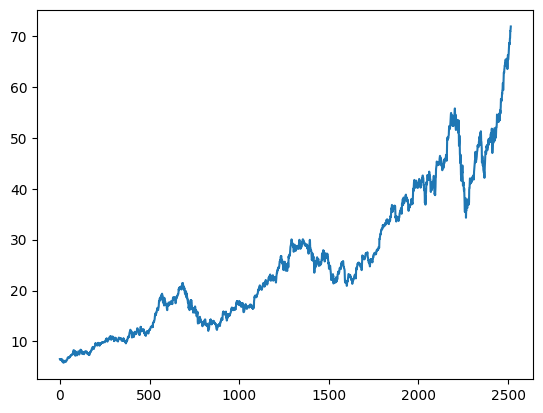

In [57]:
#plot the graph of close price
plt.plot(df.Close)

In [58]:
#create a moving average of 100 days function

ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    58.078106
2512    58.317804
2513    58.548341
2514    58.778101
2515    59.002407
Name: Close, Length: 2516, dtype: float64

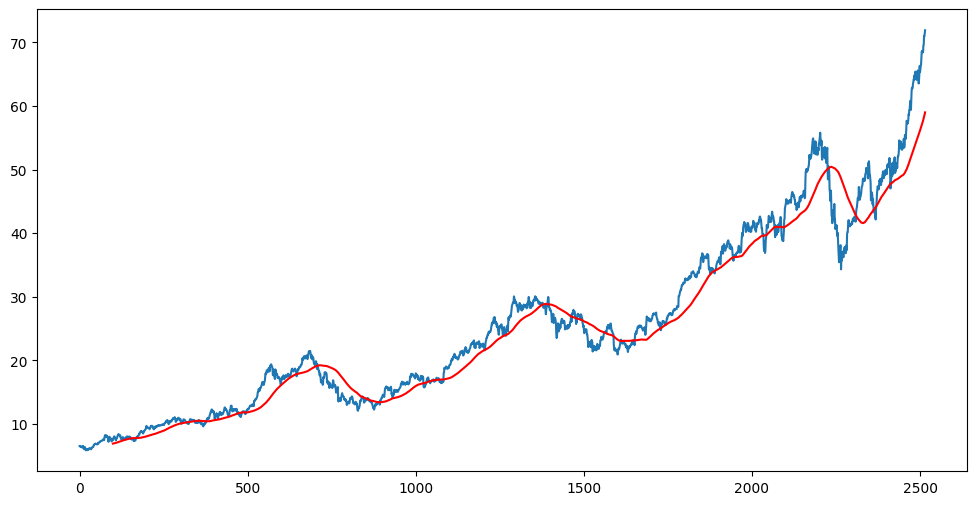

In [59]:
#plot the ma100 graph and close price 
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
